# An Attempt to Improve My 1st Linear Regression Model for Predicting the Prices of Used Cars, Given Some of Their Features.

## Importing the relevant libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
# Load the data from the .csv in the specified folder:
raw_data = pd.read_csv("/Users/GoriPNEUMA/Documents/DataSpell Files/My Portfolio/Linear Regression/Predicting the Prices of Used Cars Given Some Features of the Cars/Used Cars' Data.csv")

# Let's explore the top 5 rows of the data frame:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
# I will rearrange the data to have the target variable (Price) as the first column,
# followed by the numerical variables and then the categorical variables.
raw_data_column_list = list(raw_data) # I list the column titles so I can manually copy and rearrange them.
raw_data_column_list

['Brand',
 'Price',
 'Body',
 'Mileage',
 'EngineV',
 'Engine Type',
 'Registration',
 'Year',
 'Model']

In [4]:
# Rearranging the columns manually and storing the rearrangement in "new_columns":
new_columns = ['Price',
               'Mileage',
               'Year',
               'EngineV',
               'Brand',
               'Body',
               'Engine Type',
               'Registration',
               'Model']
final_raw = raw_data[new_columns]
final_raw # Final raw data with rearranged columns.

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration,Model
0,4200.0,277,1991,2.0,BMW,sedan,Petrol,yes,320
1,7900.0,427,1999,2.9,Mercedes-Benz,van,Diesel,yes,Sprinter 212
2,13300.0,358,2003,5.0,Mercedes-Benz,sedan,Gas,yes,S 500
3,23000.0,240,2007,4.2,Audi,crossover,Petrol,yes,Q7
4,18300.0,120,2011,2.0,Toyota,crossover,Petrol,yes,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,125000.0,9,2014,3.0,Mercedes-Benz,sedan,Diesel,yes,S 350
4341,6500.0,1,1999,3.5,BMW,sedan,Petrol,yes,535
4342,8000.0,194,1985,2.0,BMW,sedan,Petrol,yes,520
4343,14200.0,31,2014,NaN,Toyota,sedan,Petrol,yes,Corolla


## Preprocessing (Data Cleaning)

### Exploring the descriptive statistics of the variables

In [5]:
# Descriptive statistics are very useful for initial exploration of the variables.

final_raw.describe(include='all') # "include" argument is added to include descriptive statistics
                                  # for categorical variables.

# Some of the descriptive statistics are obviously not available for categorical data while
# others are not available for numerical data. For example, categorical data cannot have standard deviations.

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration,Model
count,4173.000000,4345.000000,4345.000000,4195.000000,4345,4345,4345,4345,4345
unique,NaN,NaN,NaN,NaN,7,6,4,2,312
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes,E-Class
freq,NaN,NaN,NaN,NaN,936,1649,2019,3947,199
mean,19418.746935,161.237284,2006.550058,2.790734,NaN,NaN,NaN,NaN,NaN
std,25584.242620,105.705797,6.719097,5.066437,NaN,NaN,NaN,NaN,NaN
min,600.000000,0.000000,1969.000000,0.600000,NaN,NaN,NaN,NaN,NaN
25%,6999.000000,86.000000,2003.000000,1.800000,NaN,NaN,NaN,NaN,NaN
50%,11500.000000,155.000000,2008.000000,2.200000,NaN,NaN,NaN,NaN,NaN
75%,21700.000000,230.000000,2012.000000,3.000000,NaN,NaN,NaN,NaN,NaN


### Determining the variables of interest

In [6]:
# For this model improvement attempt, I will still drop the "Model" variable as it contains
# information about other variables. This prevents multi-collinearity issues.
data = final_raw.drop(['Model'],axis=1)

# Let's check the descriptive statistics without the "Model" variable.
data.describe(include='all')

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,4173.000000,4345.000000,4345.000000,4195.000000,4345,4345,4345,4345
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,936,1649,2019,3947
mean,19418.746935,161.237284,2006.550058,2.790734,NaN,NaN,NaN,NaN
std,25584.242620,105.705797,6.719097,5.066437,NaN,NaN,NaN,NaN
min,600.000000,0.000000,1969.000000,0.600000,NaN,NaN,NaN,NaN
25%,6999.000000,86.000000,2003.000000,1.800000,NaN,NaN,NaN,NaN
50%,11500.000000,155.000000,2008.000000,2.200000,NaN,NaN,NaN,NaN
75%,21700.000000,230.000000,2012.000000,3.000000,NaN,NaN,NaN,NaN


### Dealing with missing values

In [7]:
data.isnull().sum() # Gives us the total number of missing values per variable.

Price           172
Mileage           0
Year              0
EngineV         150
Brand             0
Body              0
Engine Type       0
Registration      0
dtype: int64

In [8]:
# I will simply drop all missing values:
data_no_mv = data.dropna(axis=0) # data_no_mv => data with no missing values.

In [9]:
# Let's now check the descriptive statistics without the missing values:
data_no_mv.describe(include='all')

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,4025.000000,4025.000000,4025.000000,4025.000000,4025,4025,4025,4025
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,880,1534,1861,3654
mean,19552.308065,163.572174,2006.379627,2.764586,NaN,NaN,NaN,NaN
std,25815.734988,103.394703,6.695595,4.935941,NaN,NaN,NaN,NaN
min,600.000000,0.000000,1969.000000,0.600000,NaN,NaN,NaN,NaN
25%,6999.000000,90.000000,2003.000000,1.800000,NaN,NaN,NaN,NaN
50%,11500.000000,158.000000,2007.000000,2.200000,NaN,NaN,NaN,NaN
75%,21900.000000,230.000000,2012.000000,3.000000,NaN,NaN,NaN,NaN


### Dealing with duplicate values
##### I realised I omitted this step in the 1st model.

In [10]:
# Check for total number of duplicate values:
data_no_mv.duplicated().sum()

66

In [11]:
# Remove all duplicate values:
data_no_dup = data_no_mv.drop_duplicates() # data_no_dup => data with no duplicates.
data_no_dup

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
0,4200.0,277,1991,2.0,BMW,sedan,Petrol,yes
1,7900.0,427,1999,2.9,Mercedes-Benz,van,Diesel,yes
2,13300.0,358,2003,5.0,Mercedes-Benz,sedan,Gas,yes
3,23000.0,240,2007,4.2,Audi,crossover,Petrol,yes
4,18300.0,120,2011,2.0,Toyota,crossover,Petrol,yes
...,...,...,...,...,...,...,...,...
4338,11500.0,163,2008,2.5,Volkswagen,van,Diesel,yes
4339,17900.0,35,2014,1.6,Toyota,sedan,Petrol,yes
4340,125000.0,9,2014,3.0,Mercedes-Benz,sedan,Diesel,yes
4341,6500.0,1,1999,3.5,BMW,sedan,Petrol,yes


### Exploring the PDFs

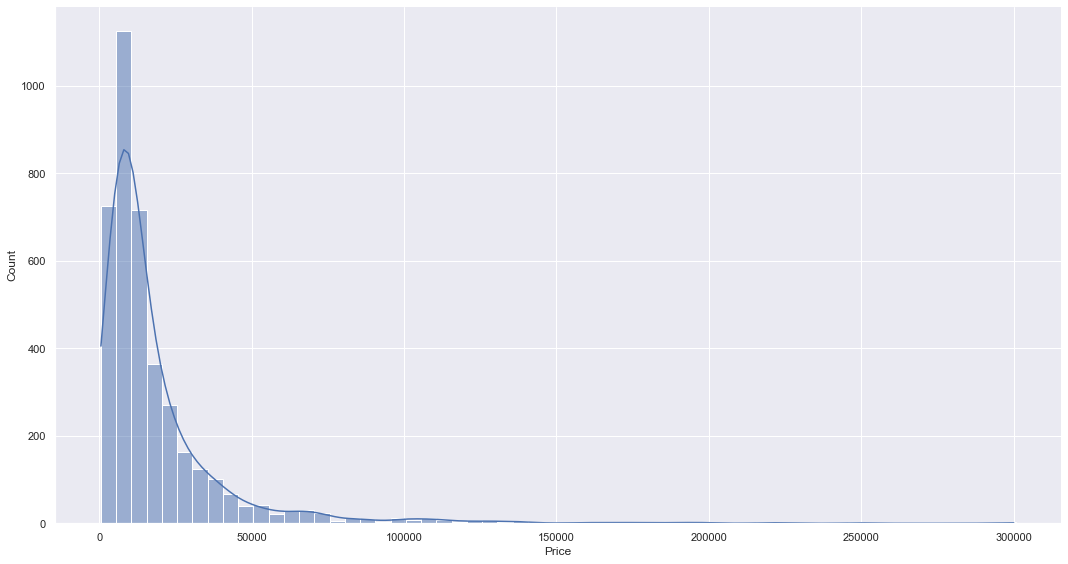

In [12]:
# A great step in the data exploration is to display the probability distribution function (PDF) of each variable.
# The PDF shows us how each variable is distributed and makes it easy to spot anomalies such as outliers.
# The PDF is also often the basis on which we decide whether we want to transform a feature/variable.
# We must also realise that only numerical variables can have a PDF.
sns.displot(data_no_dup['Price'], kde = True, binwidth = 5000, height=8, aspect=15/8) # "Price" PDF

### Dealing with outliers

In [13]:
# Apparently there are some outliers present.
# We already talked (in the 1st model) about how prices around $300,000 seem to be excessive for used cars.
# I will remove 1% of the observations from the higher end of "Price" (right side of the graph).
# Outliers can cause heteroscedasticity in our data and we do not want that.

# Let's declare a variable that will be equal to the 99th percentile of the "Price" variable:
q = data_no_dup["Price"].quantile(0.99)

# I will now create a new data frame, with the condition that all prices must be below the 99 percentile of "Price":
data_1 = data_no_dup[data_no_dup["Price"]<q]

# In this way we have essentially removed the top 1% of the data about "Price". Let's now see the data summary:
data_1.describe(include='all')

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,3918.000000,3918.000000,3918.000000,3918.000000,3918,3918,3918,3918
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,864,1502,1812,3547
mean,17293.577836,166.554109,2006.188106,2.744513,NaN,NaN,NaN,NaN
std,18063.109785,102.497705,6.659415,4.995953,NaN,NaN,NaN,NaN
min,600.000000,0.000000,1969.000000,0.600000,NaN,NaN,NaN,NaN
25%,6900.000000,95.000000,2002.000000,1.800000,NaN,NaN,NaN,NaN
50%,11200.000000,160.000000,2007.000000,2.200000,NaN,NaN,NaN,NaN
75%,20844.362500,230.000000,2011.000000,3.000000,NaN,NaN,NaN,NaN


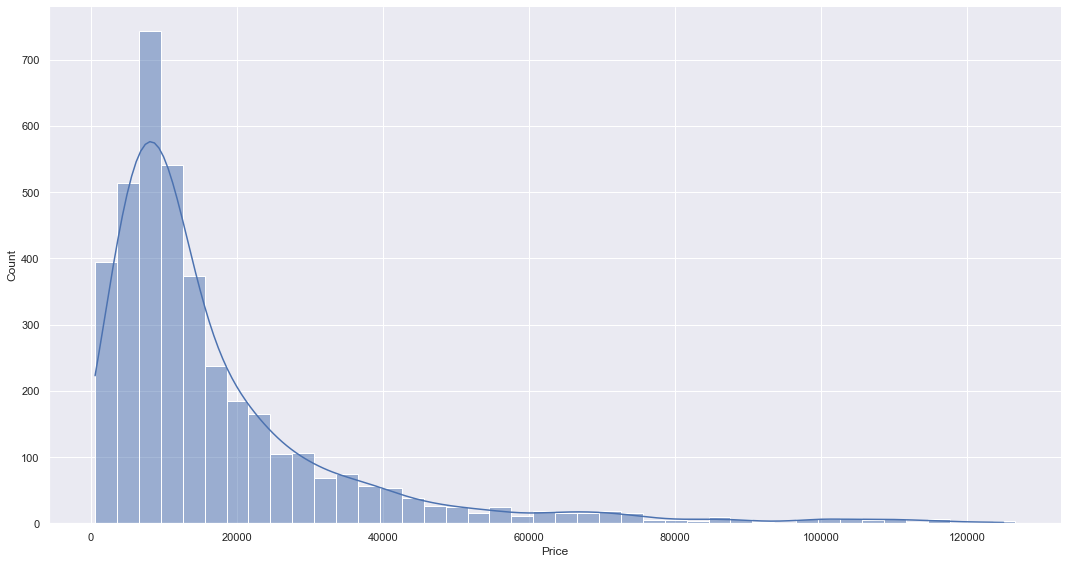

In [14]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall,
# although there are much fewer outliers:
sns.displot(data_1["Price"], kde = True, binwidth = 3000, height=8, aspect=15/8)

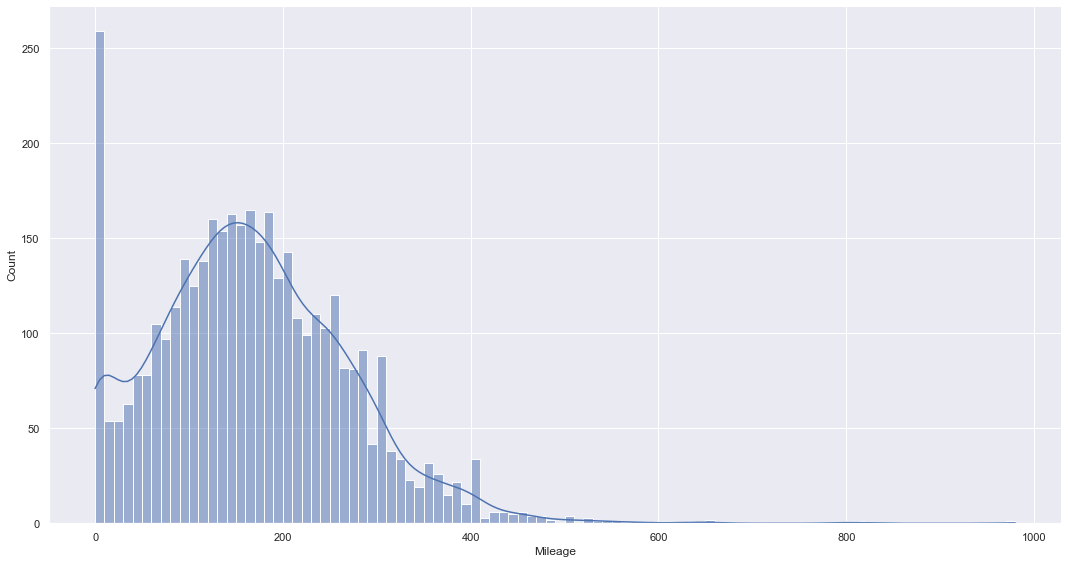

In [15]:
# We can treat the other numerical variables in a similar way:
sns.displot(data_1["Mileage"], kde = True, binwidth = 10, height=8, aspect=15/8)

### I will be removing only the top 0.5% of observations from the Mileage variable (instead of 1% as we did in the 1st model). This is because the number of outliers to the right side of the "Mileage" variable are not so many.

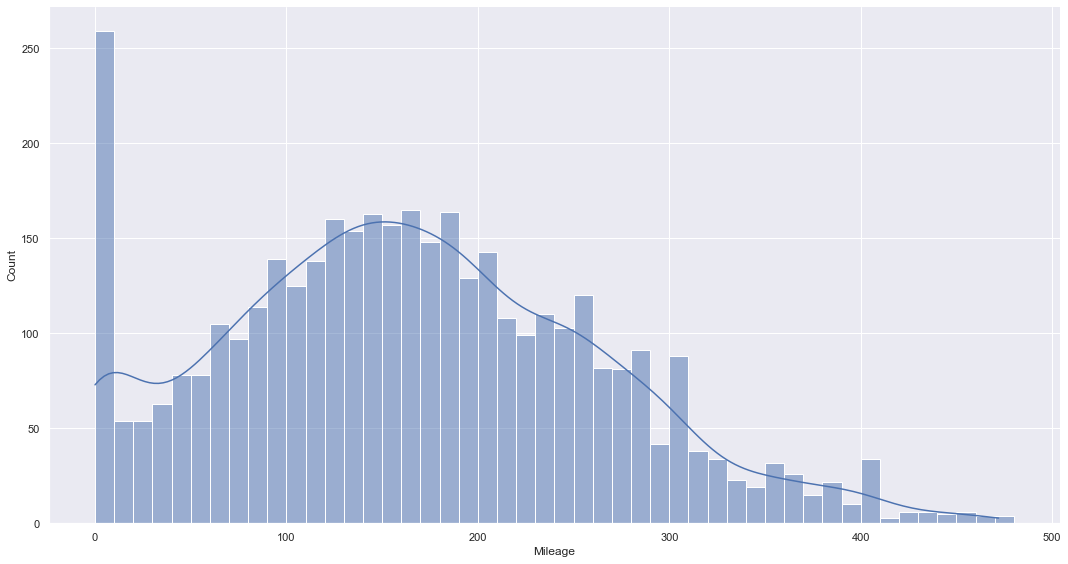

In [16]:
q = data_1["Mileage"].quantile(0.995)
data_2 = data_1[data_1["Mileage"]<q]
sns.displot(data_2["Mileage"], kde = True, binwidth = 10, height=8, aspect=15/8)

#### We can see that the plot above looks kind of normal.

In [17]:
data_2.describe(include="all") # A peek at our data summary after removing "Mileage" outliers.

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,3898.000000,3898.000000,3898.000000,3898.000000,3898,3898,3898,3898
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,856,1496,1796,3527
mean,17321.918409,164.368138,2006.224474,2.746614,NaN,NaN,NaN,NaN
std,18066.857606,97.670069,6.636084,5.008429,NaN,NaN,NaN,NaN
min,600.000000,0.000000,1969.000000,0.600000,NaN,NaN,NaN,NaN
25%,6900.000000,95.000000,2002.000000,1.800000,NaN,NaN,NaN,NaN
50%,11200.000000,160.000000,2007.000000,2.200000,NaN,NaN,NaN,NaN
75%,20900.000000,230.000000,2011.000000,3.000000,NaN,NaN,NaN,NaN


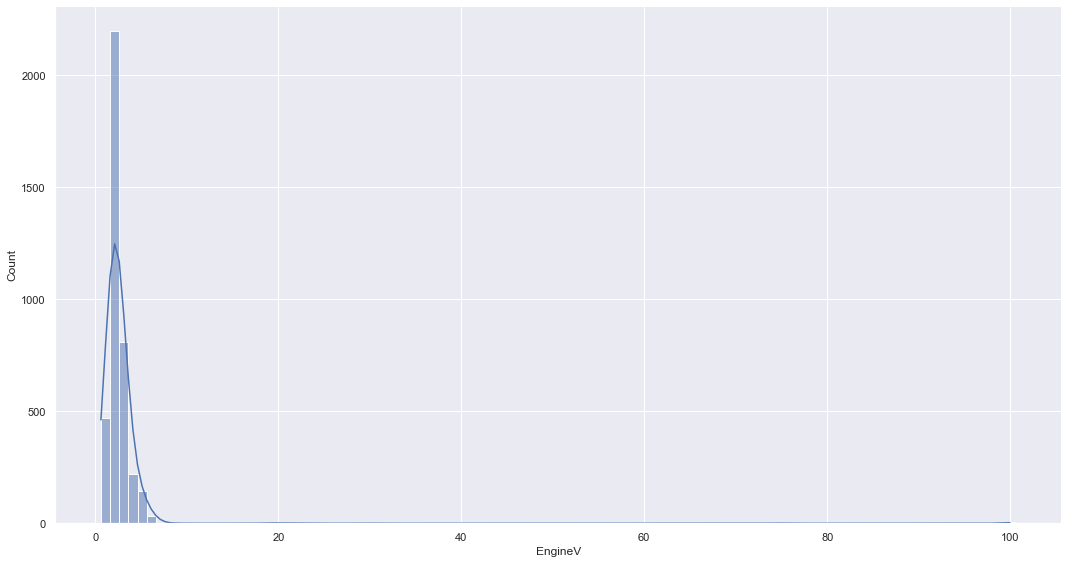

In [18]:
# Just like in the 1st model, we can see that the "EngineV" (Engine Volume) variable has
# unrealistically high figures going up to 100.
sns.displot(data_2["EngineV"], kde = True, binwidth = 1, height=8, aspect=15/8)

### I will assume (from online research) that the highest car engine volume is about 8.4l

In [19]:
# I found online that a few cars (e.g. Dodge Viper V10) can have engine volumes that reach up to 8.4l
# It is true that this is a "used car" model, but I can see Mercedes Benz among the sold car brands.
# Mercedes Benz makes fast luxury cars with huge engine volumes.
# Therefore, I will keep all observations with engine volumes less than 8.4:
data_3 = data_2[data_2["EngineV"]<8.4]

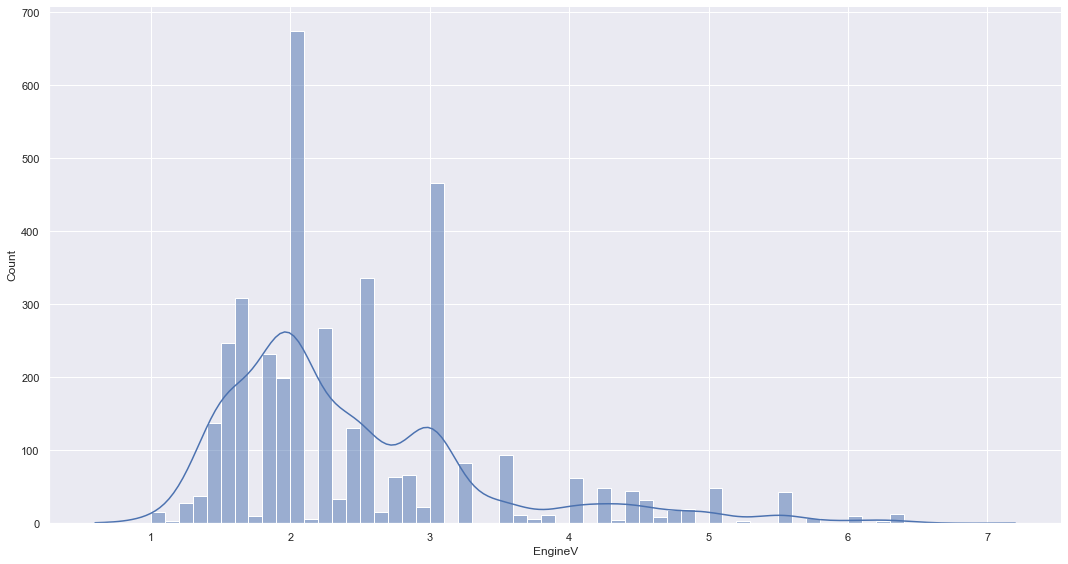

In [20]:
sns.displot(data_3["EngineV"], kde = True, binwidth = 0.1, height=8, aspect=15/8)

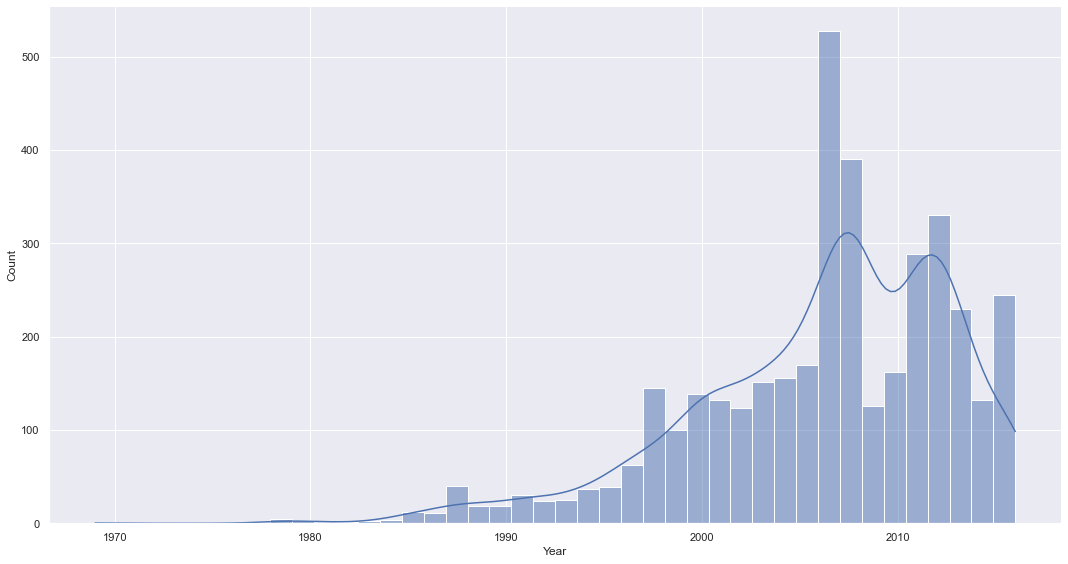

In [21]:
# Finally, the situation with "Year" is similar to "Price" and "Mileage".
# However, the outliers are on the low end.
sns.displot(data_3["Year"], kde = True, height=8, aspect=15/8)

### I will be removing only 0.5% (instead of 1% like we did in the 1st model) of the outliers in the "Year" variable. We still want to try to preserve the range of cars that were sold according to their year of manufacture, but without too many outliers.

In [22]:
q = data_3["Year"].quantile(0.005)
data_4 = data_3[data_3["Year"]>q]

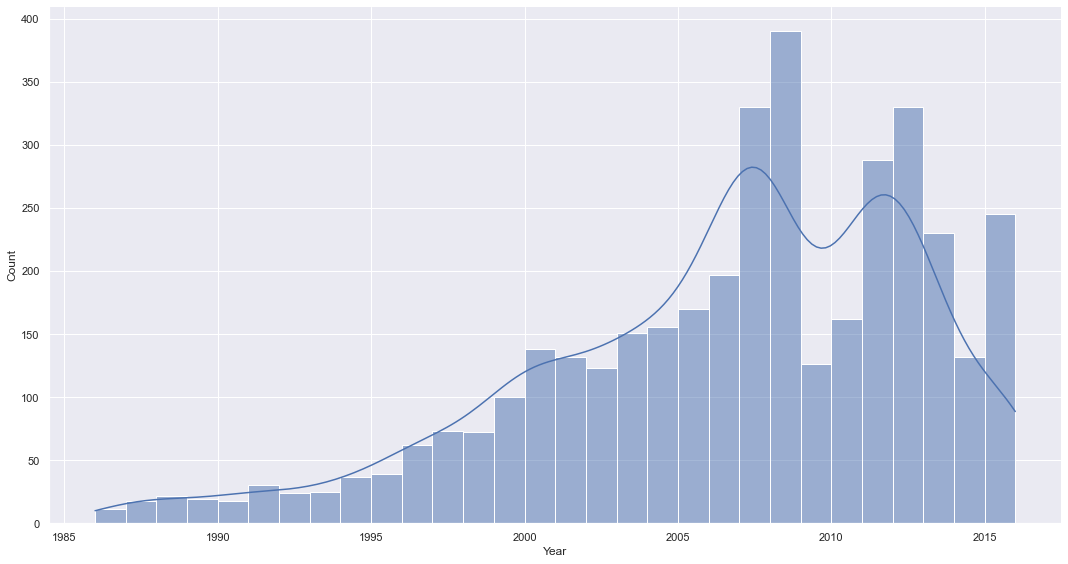

In [23]:
# Here's the new result
sns.displot(data_4["Year"], kde = True, height=8, aspect=15/8)

In [24]:
# As we have been removing observations, the original indexes have been preserved.
# We must now reset the index.
# A new column will be created containing the old index.
# We won't be needing this new column, so the "drop=True" argument is included:
data_cleaned = data_4.reset_index(drop=True)

### Let's now see the descriptive statistics for our final, cleaned data set.
##### Yes, we have removed about 11% overall of the original data set. However, I believe we are still left with a substantial amount of the original data - 3,850 observations!

In [25]:
data_cleaned.describe(include='all')

,Price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,3850.000000,3850.000000,3850.000000,3850.000000,3850,3850,3850,3850
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,845,1468,1783,3485
mean,17469.713691,163.900260,2006.409351,2.443836,NaN,NaN,NaN,NaN
std,18117.594836,97.328474,6.339836,0.950829,NaN,NaN,NaN,NaN
min,800.000000,0.000000,1986.000000,0.600000,NaN,NaN,NaN,NaN
25%,7000.000000,95.000000,2003.000000,1.800000,NaN,NaN,NaN,NaN
50%,11400.000000,160.000000,2007.000000,2.200000,NaN,NaN,NaN,NaN
75%,20999.000000,230.000000,2011.000000,3.000000,NaN,NaN,NaN,NaN


## Checking the Linear Regression (with Ordinary Least Squares - OLS) assumptions

### 1. Confirmation of Linearity
##### There must be a linear or near-linear relationship between the dependent variable (target) and each of the
##### independent variables (features).

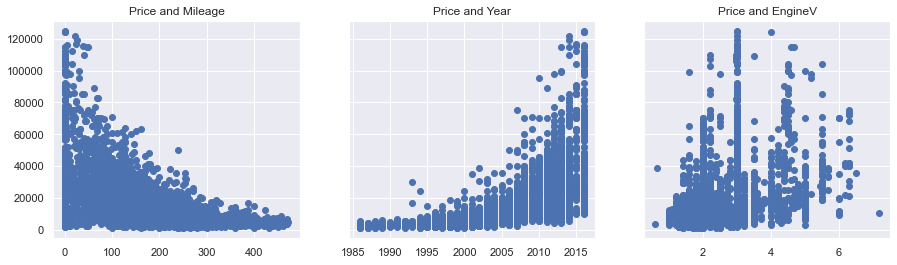

In [26]:
# Since Price is the y-axis of all 3 plots, I am plotting them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey="all", figsize =(15,4)) #sharey => share "Price" as y
ax1.scatter(data_cleaned["Mileage"],data_cleaned["Price"])
ax1.set_title("Price and Mileage")
ax2.scatter(data_cleaned["Year"],data_cleaned["Price"])
ax2.set_title("Price and Year")
ax3.scatter(data_cleaned["EngineV"],data_cleaned["Price"])
ax3.set_title("Price and EngineV")


plt.show()

#### From the subplots above and the PDF of price, we can determine that "Price" is exponentially distributed. A good transformation in this case is a log transformation.

#### Relaxing the assumptions:

In [27]:
# I will now do a log transformation on "Price":
log_price = np.log(data_cleaned["Price"])

# Then I will add it to our data frame:
data_cleaned["log_price"] = log_price

# Rearrange the data frame to have "log_price" after "Price":
column_list = list(data_cleaned)
column_list

['Price',
 'Mileage',
 'Year',
 'EngineV',
 'Brand',
 'Body',
 'Engine Type',
 'Registration',
 'log_price']

In [28]:
data_cleaned_column_list = ['Price',
                            'log_price',
                            'Mileage',
                            'Year',
                            'EngineV',
                            'Brand',
                            'Body',
                            'Engine Type',
                            'Registration']
data_cleaned_1 = data_cleaned[data_cleaned_column_list]
data_cleaned_1

,Price,log_price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
0,4200.0,8.342840,277,1991,2.0,BMW,sedan,Petrol,yes
1,7900.0,8.974618,427,1999,2.9,Mercedes-Benz,van,Diesel,yes
2,13300.0,9.495519,358,2003,5.0,Mercedes-Benz,sedan,Gas,yes
3,23000.0,10.043249,240,2007,4.2,Audi,crossover,Petrol,yes
4,18300.0,9.814656,120,2011,2.0,Toyota,crossover,Petrol,yes
...,...,...,...,...,...,...,...,...,...
3845,2100.0,7.649693,237,2001,1.9,Renault,vagon,Diesel,no
3846,6800.0,8.824678,152,2007,1.6,Renault,sedan,Petrol,yes
3847,11500.0,9.350102,163,2008,2.5,Volkswagen,van,Diesel,yes
3848,17900.0,9.792556,35,2014,1.6,Toyota,sedan,Petrol,yes


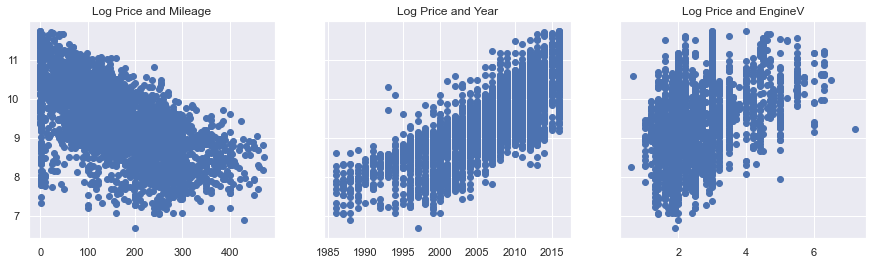

In [29]:
# Let's now check again for linearity between the target and the numerical features.
# Remember we will now be using "log_price" instead of "Price":
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey="all", figsize =(15,4))
ax1.scatter(data_cleaned_1["Mileage"],data_cleaned_1["log_price"])
ax1.set_title("Log Price and Mileage")
ax2.scatter(data_cleaned_1["Year"],data_cleaned_1["log_price"])
ax2.set_title("Log Price and Year")
ax3.scatter(data_cleaned_1["EngineV"],data_cleaned_1["log_price"])
ax3.set_title("Log Price and EngineV")


plt.show()

In [30]:
# We can see from the plots above that there is a linear or near-linear relationship
# between our transformed target and each of our numerical features.
# We can now proceed.
# Since we will be using the log_price variable, we can drop the old "Price" variable.
data_cleaned_1 = data_cleaned_1.drop(["Price"],axis=1)

### 2. Confirmation of No Multi-collinearity
##### No feature/predictor should be perfectly (or almost perfectly) explained by the other predictors.
[Note: I have been using the following terms interchangeably: "feature", "independent variable", "predictor" (these all
mean the same thing, including "explanatory variable"). Also, "dependent variable" and "target" mean the same thing and can be used interchangeably too.]

In [31]:
# Let's quickly see our updated data:
data_cleaned_1

,log_price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
0,8.342840,277,1991,2.0,BMW,sedan,Petrol,yes
1,8.974618,427,1999,2.9,Mercedes-Benz,van,Diesel,yes
2,9.495519,358,2003,5.0,Mercedes-Benz,sedan,Gas,yes
3,10.043249,240,2007,4.2,Audi,crossover,Petrol,yes
4,9.814656,120,2011,2.0,Toyota,crossover,Petrol,yes
...,...,...,...,...,...,...,...,...
3845,7.649693,237,2001,1.9,Renault,vagon,Diesel,no
3846,8.824678,152,2007,1.6,Renault,sedan,Petrol,yes
3847,9.350102,163,2008,2.5,Volkswagen,van,Diesel,yes
3848,9.792556,35,2014,1.6,Toyota,sedan,Petrol,yes


### In our 1st model, we already talked about regressions with and without constants. We know our case does not already have a constant so we will add a constant before finding the Variance Inflation Factors (VIFs) of our numerical features as shown below:

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = data_cleaned_1[['Mileage','Year','EngineV']]
variables = add_constant(variables)

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,199319.942587,const
1,1.974628,Mileage
2,1.974600,Year
3,1.000083,EngineV


#### We can see from the results above that there is negligible multi-collinearity among the numerical predictors (as their respective VIFs are below 5.0). We should also note that the VIF value for the constant is irrelevant to our model, however, it is important that it appears in the VIF results.


### 3. Confirmation of No Endogeneity
#### No correlation between the residuals and features

In [33]:
data_cleaned_1.head() # A quick peek at our updated data

,log_price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
0,8.342840,277,1991,2.0,BMW,sedan,Petrol,yes
1,8.974618,427,1999,2.9,Mercedes-Benz,van,Diesel,yes
2,9.495519,358,2003,5.0,Mercedes-Benz,sedan,Gas,yes
3,10.043249,240,2007,4.2,Audi,crossover,Petrol,yes
4,9.814656,120,2011,2.0,Toyota,crossover,Petrol,yes


In [34]:
# I will first use OLS from the statsmodels library to perform the regression,
# so I can obtain the residuals easily with the .resid function and have a summary of results.
# Also, keep an eye on the R-squared and Adjusted R-squared.
y = data_cleaned_1["log_price"]
x1 = data_cleaned_1[["Mileage", "Year", "EngineV"]]

In [35]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     3809.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:29:28   Log-Likelihood:                -2293.4
No. Observations:                3850   AIC:                             4595.
Df Residuals:                    3846   BIC:                             4620.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -168.8767      3.160    -53.436      0.000    -175.073    -162.681
Mileage       -0.0014      0.000    -13.965      0.000      -0.002      -0.001
Year           0.0885      0.002     56.393      0.000       0.085       0.092
EngineV        0.3840      0.007     51.577      0.000       0.369       0.399
==============================================================================
Omnibus:                       54.614   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.840
Skew:                          -0.243   Prob(JB):                     3.73e-14
Kurtosis:                       3.385   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
residuals = results.resid

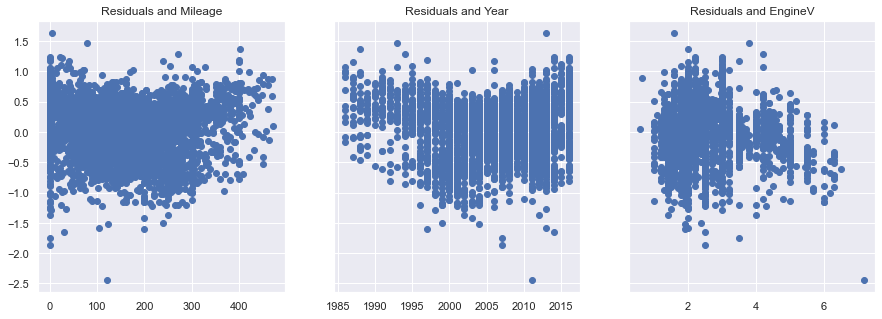

In [38]:
# We will now do a scatter plot of the residuals against each feature,
# to confirm there is no correlation between them.
fig, (bx1, bx2, bx3) = plt.subplots(1, 3, sharey="all", figsize =(15,5))
bx1.scatter(data_cleaned_1["Mileage"], residuals)
bx1.set_title("Residuals and Mileage")
bx2.scatter(data_cleaned_1["Year"], residuals)
bx2.set_title("Residuals and Year")
bx3.scatter(data_cleaned_1["EngineV"], residuals)
bx3.set_title("Residuals and EngineV")

plt.show()

#### The three scatter plots above show that there is no correlation between the independent variables (features) and the Error Term (Residuals). Therefore this data supports the linear regression assumption of "No Endogeneity".

### 4. Confirmation of Normality of Error Term (Residuals)
#### Error Term (Residuals) should follow a normal or nearly normal distribution

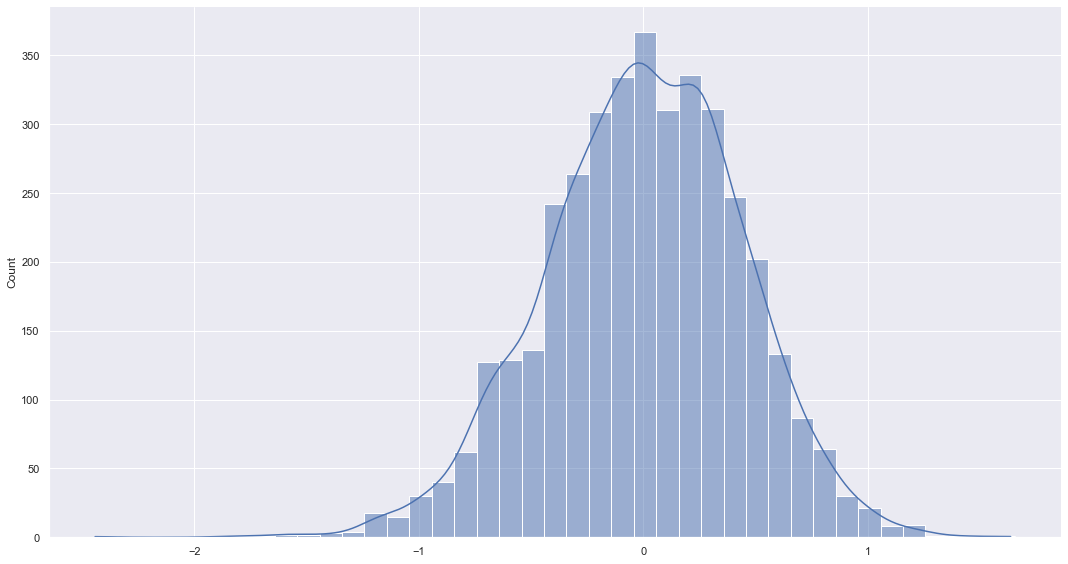

In [39]:
sns.displot(residuals, kde = True, binwidth = 0.1, height=8, aspect=15/8)

#### The PDF plot (above) of the residuals show that they are normally distributed.

### 5. Confirmation of Homoscedasticity
#### Variance of Residuals should be constant/nearly constant across observations.

In [40]:
# What we do here is a scatter plot of the residuals against the target with a horizontal line through the origin.
# What we do not want to see is a funnel or cone shape, where the distance of points from the horizontal line
# steadily increase as we move from the left side to the right side of the plot.
# This means that the variance of the residuals is not constant across observations.
# See the image below as an example of heteroscedasticity (which means "no homoscedasticity")
# If the image below does not display, please check it out in the repo, saved as: "heteroskedasticity_image.png"
# Cheers!

<img height="600" src="/Users/GoriPNEUMA/Documents/DataSpell Files/My Portfolio/Linear Regression/Predicting the Prices of Used Cars Given Some Features of the Cars/heteroskedasticity_image.png" title="Heteroscedasticity" width="750"/>

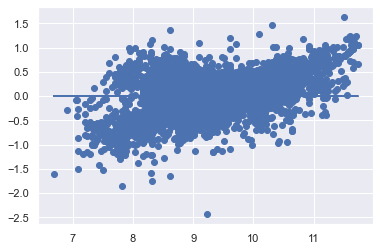

In [41]:
plt.scatter(y, residuals)
plt.plot(y, [0]*len(y))

#### We can see in the plot above that there is no steady increase in the distance between points and the horizontal line as we move from left to right. There is no funnel/cone shaped plot, therefore we can confirm there is homoscedasticity (or no heteroscedasticity) in our data.

### 6. Confirmation of No Autocorrelation
#### No identifiable relationship between residuals.

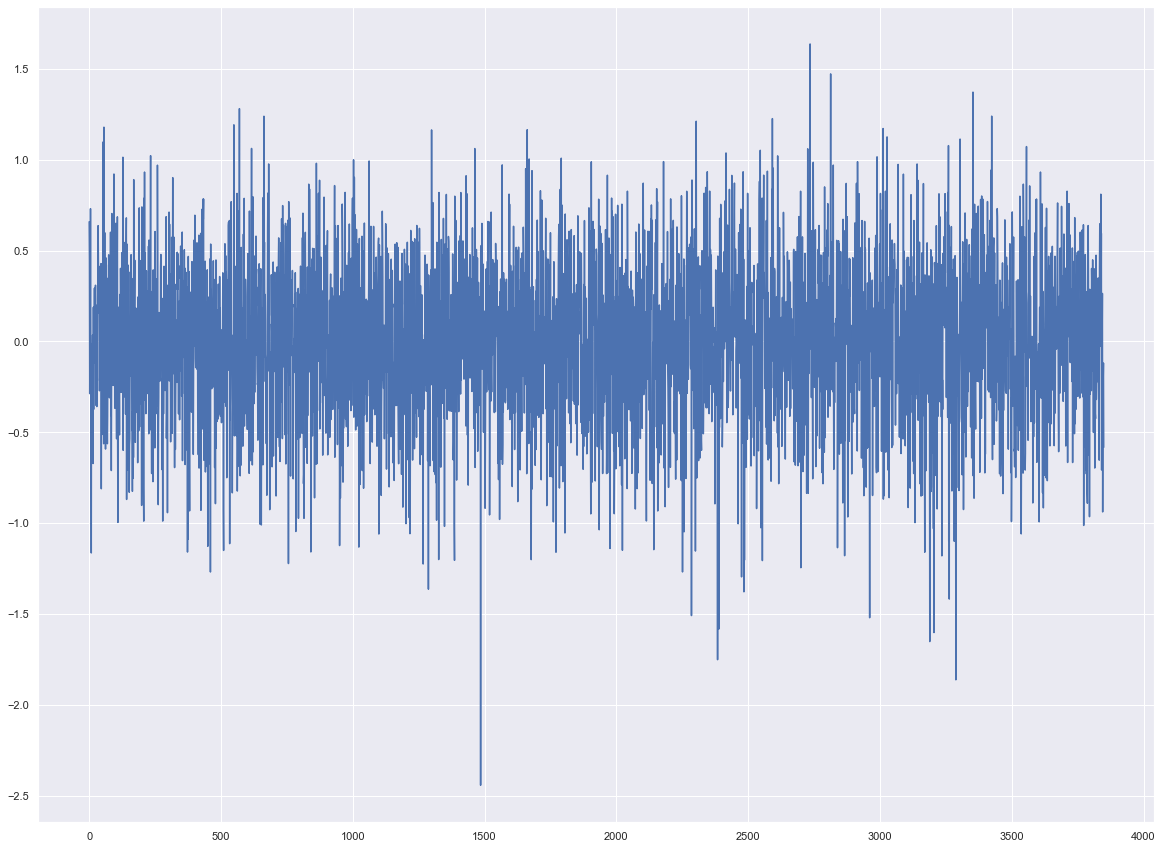

In [42]:
# A way to check this is to do a "time-series" kind of plot of the residuals.
# There should be quick changes in the directions (positive and negative) of consecutive residual values,
# not a cluster of residuals that move in the same direction (either positive or negative).
# The plot below confirms this.
plt.figure(figsize=(20,15))
plt.plot(residuals.index, residuals)

## All Linear Regression assumptions have now been verified/confirmed. We can now move ahead by dealing with the categorical (non-numerical variables).

In [43]:
# Let's quickly remind ourselves of our data frame:
data_cleaned_1.head()

,log_price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
0,8.342840,277,1991,2.0,BMW,sedan,Petrol,yes
1,8.974618,427,1999,2.9,Mercedes-Benz,van,Diesel,yes
2,9.495519,358,2003,5.0,Mercedes-Benz,sedan,Gas,yes
3,10.043249,240,2007,4.2,Audi,crossover,Petrol,yes
4,9.814656,120,2011,2.0,Toyota,crossover,Petrol,yes


## Create dummy variables

In [44]:
# To include the categorical data in the regression, let's create dummies.
# Do not forget to drop one of the dummies (in each category), or else we will introduce (perfect or near
# perfect) multi-collinearity. We do not want that.
data_with_dummies = pd.get_dummies(data_cleaned_1)

In [45]:
# Here's the result
data_with_dummies.head()

,log_price,Mileage,Year,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,8.342840,277,1991,2.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,8.974618,427,1999,2.9,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,9.495519,358,2003,5.0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,10.043249,240,2007,4.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,9.814656,120,2011,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


### Unlike what I did in the 1st model, I will not automatically drop the first dummy of each categorical variable. Instead, I will drop the dummies with the highest number of observations in each category and use them as reference/baseline. Dropping the right dummy may not improve the accuracy of the model but it can improve the interpretability of the predictors' weights at the end of the model building exercise. You may read this article for more info: https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707

In [46]:
# To see which dummy will have the highest number of observations, I will display the summary.
# The values for "top" indicate the most frequently occurring value in each categorical feature.
# For example, there are more Volkswagen brands (845) than any other car brand.
# Another example, there are more registered cars (3,485) than those that are not registered.
data_cleaned_1.describe(include="all")

,log_price,Mileage,Year,EngineV,Brand,Body,Engine Type,Registration
count,3850.000000,3850.000000,3850.000000,3850.000000,3850,3850,3850,3850
unique,NaN,NaN,NaN,NaN,7,6,4,2
top,NaN,NaN,NaN,NaN,Volkswagen,sedan,Diesel,yes
freq,NaN,NaN,NaN,NaN,845,1468,1783,3485
mean,9.379744,163.900260,2006.409351,2.443836,NaN,NaN,NaN,NaN
std,0.874960,97.328474,6.339836,0.950829,NaN,NaN,NaN,NaN
min,6.684612,0.000000,1986.000000,0.600000,NaN,NaN,NaN,NaN
25%,8.853665,95.000000,2003.000000,1.800000,NaN,NaN,NaN,NaN
50%,9.341369,160.000000,2007.000000,2.200000,NaN,NaN,NaN,NaN
75%,9.952230,230.000000,2011.000000,3.000000,NaN,NaN,NaN,NaN


In [47]:
list(data_with_dummies) # A list of all dummies, so we can manually drop the ones with the most observations.

['log_price',
 'Mileage',
 'Year',
 'EngineV',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_crossover',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Diesel',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_no',
 'Registration_yes']

In [48]:
data_with_dummies2 = data_with_dummies.drop(['Brand_Volkswagen','Body_sedan',
                                             'Engine Type_Diesel','Registration_yes'], axis=1)

# Let us now see the data frame with dummies added and one reference dummy per variable dropped.
data_with_dummies2

,log_price,Mileage,Year,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Body_crossover,Body_hatch,Body_other,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no
0,8.342840,277,1991,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8.974618,427,1999,2.9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,9.495519,358,2003,5.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,10.043249,240,2007,4.2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,9.814656,120,2011,2.0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,7.649693,237,2001,1.9,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3846,8.824678,152,2007,1.6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3847,9.350102,163,2008,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3848,9.792556,35,2014,1.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


#### Check the VIF of features only (including the dummies, without the target).

In [49]:
# Checking VIF of features including dummies.
data_with_dummies3 = data_with_dummies2.drop(["log_price"], axis=1) # Remember "log_price" is now our target,
                                                                    # so it cannot be included in the feature list.

data_with_dummies3 = add_constant(data_with_dummies3) # Do not forget this step if there is not already
                                                      # a constant included (which is our case here).
vif2 = pd.DataFrame()

vif2["VIF"] = [variance_inflation_factor(data_with_dummies3.values, i) for i in range(data_with_dummies3.shape[1])]

vif2["Features"] = data_with_dummies3.columns

vif2

,VIF,Features
0,237588.972933,const
1,2.350551,Mileage
2,2.351706,Year
3,1.579311,EngineV
4,1.501430,Brand_Audi
5,1.755605,Brand_BMW
6,1.778922,Brand_Mercedes-Benz
7,1.424704,Brand_Mitsubishi
8,1.415288,Brand_Renault
9,1.647787,Brand_Toyota


### All the relevant VIFs above seem to be in order (remember the VIF value for "const" is not relevant, it's just important that it exists).

## The Linear Regression Model

### Declaring the inputs and the targets

In [50]:
data_preprocessed = data_with_dummies2 # New variable containing updated data set with all features plus target.

# The target (dependent variable) is "log_price"
targets = data_preprocessed["log_price"]

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(["log_price"],axis=1)

### In the 1st model, I scaled the data at this point. Considering the fact that I want to do a Train-Test-Split, the data scaling (standardisation) should be done after the Train-Test-Split. This is to prevent data leakage and consequently Over-fitting. Whatever transformation will be done on the data before a Train-Test-Split MUST NOT use any information from the potential test data. All we have been doing before now (removal of missing and duplicate observations, log transformation of "Price", checking OLS assumptions, etc.) have not transformed our data with information from the potential test data. However, scaling/standardising our data involves the use of mean and standard deviation (which are calculated from all observations including potential test data, unless we separate our test data first which is what we will now do).

### Train Test Split

In [51]:
# Importing the module for the split:
from sklearn.model_selection import train_test_split

# I will split the observations with an 80%:20% split and a specified random state.
# We use the specified random state to ensure we always get the exact same split
# everytime we run/re-run this part of our code throughout this model building exercise.
# As my alias has 16 characters, I will use 16 as my random state :)
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=16)

### Scale the data
##### We can now proceed with scaling our data (which of course will just be the train data).

In [52]:
# Importing the scaling module:
from sklearn.preprocessing import StandardScaler

# Creating a scaler object:
scaler = StandardScaler()

# Fitting the train inputs (calculates the mean and standard deviation feature-wise)
scaler.fit(x_train)

StandardScaler()

In [53]:
# Scaling the features and storing in a new variable (the actual scaling procedure):
x_train_scaled = scaler.transform(x_train)

### Creating the regression
##### We are using the sklearn library

In [54]:
reg = LinearRegression() # Creates a linear regression object

# Fitting the regression with the scaled TRAIN inputs and targets
reg.fit(x_train_scaled,y_train)

LinearRegression()

In [55]:
# Let's check the outputs of our regression.
# I'll store them in y_hat as this is the 'theoretical' name of the predictions.
y_hat = reg.predict(x_train_scaled)

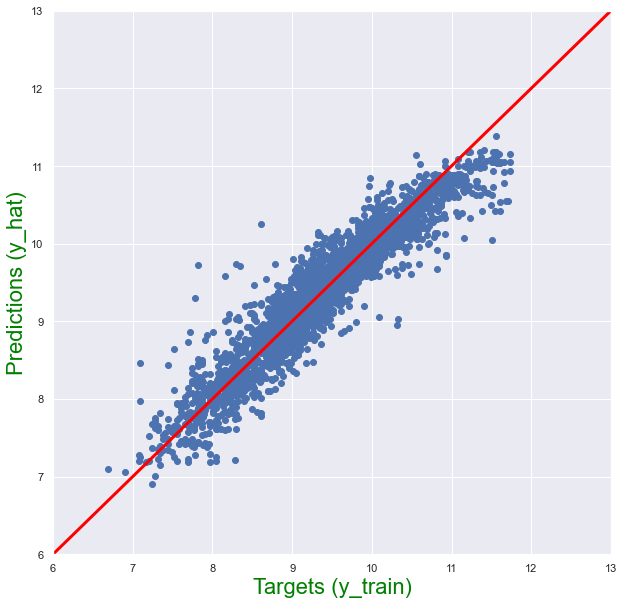

In [56]:
# The simplest way to compare the targets (y_train) and our regression's predictions (y_hat) is to plot them on a scatter plot.
# The closer the points are to the 45-degree line, the better our regression's predictions.
plt.figure(figsize=(10,10))
plt.scatter(y_train, y_hat)

plt.xlabel("Targets (y_train)",size=22, c="green") # Naming and formatting our axes
plt.ylabel("Predictions (y_hat)",size=22, c="green")

# Note that we want the x-axis and the y-axis to have the exact same scale,
# that's the only way our "45-degree line" method can work and be interpreted correctly:
plt.xlim(6,13)
plt.ylim(6,13)
plt.axline((0,0), slope=1, c="red", linewidth=3) # This is for the 45-degree line through the origin,
                                                 # showing that most of the points are close to the line.
                                                 # This is one of the ways to verify the accuracy of our model.
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

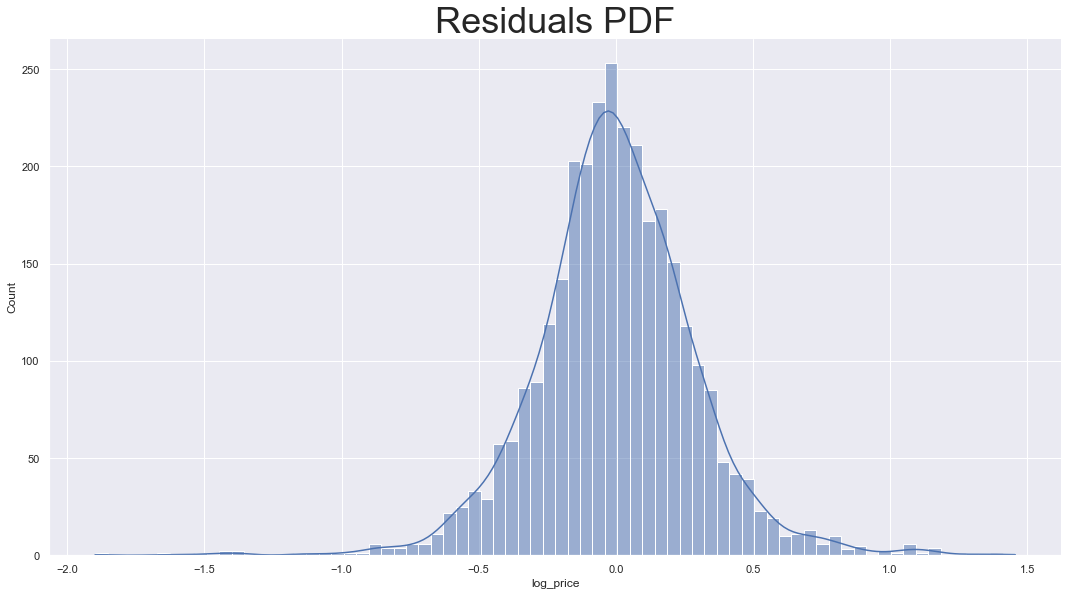

In [57]:
# Another useful check of our model is a residual plot.
# We can plot the PDF of the residuals and check for anomalies.
sns.displot(y_train - y_hat, kde=True, height=8, aspect=15/8)

# The residual is the difference between the actual price of a used car (from our data set): "y_train",
# and the price of that same car: "y_hat" (predicted by our model).

plt.title("Residuals PDF", size=36) # PDF plot title

#### In the best case scenario, the Residuals PDF plot should be normally distributed (which is what we have above). In our case, we notice from the Residuals PDF, that there are more negative residuals than positive ones. Given the definition of the residuals (y_train - y_hat), this implies that in more cases, y_hat (predictions) are higher than y_train (the targets/actual prices from the data set). This is just an observation and not necessarily an indication of the accuracy of our model.

### Finding R-Squared and Adjusted R-Squared of our model to estimate how good our model is.

In [58]:
# Finding the R-squared:
reg.score(x_train_scaled,y_train)

# Note that this is NOT the adjusted R-Squared.
# In other words, we must find the Adjusted R-Squared to have the appropriate measure.

0.8873311925976722

***
#### Find the adjusted R-squared

$ R^{2}_{adj.} = 1 - \frac{\left(1-R^{2}\right)\left(n-1\right)}{n-p-1} $

In [59]:
x_train_scaled.shape

(3080, 18)

In [60]:
r2 = reg.score(x_train_scaled,y_train)
n = x_train_scaled.shape[0]
p = x_train_scaled.shape[1]
r2_adjusted = 1-(((1-r2)*(n-1))/(n-p-1))
r2_adjusted

0.8866686514237938

#### We can see that the Adjusted R-Squared (88.7%) is not different from the R-Squared (also 88.7%), indicating that our model is quite accurate. 88.7% of the logic behind the data is explained by our model.

***

### Finding the weights and bias

In [61]:
# Obtaining the bias (intercept) of our regression:
reg.intercept_

9.368626540965337

In [62]:
# Obtaining the respective weights (coefficients) of our regression:
# These show us how much each feature contributes to our predictive model.
reg.coef_

array([-0.10806197,  0.50341321,  0.20998736,  0.07585995,  0.1075076 ,
        0.09163673, -0.07205361, -0.12623365,  0.00892291,  0.12555387,
       -0.02223034,  0.01272562, -0.01091475, -0.04855096, -0.04279482,
       -0.01645154, -0.05608528, -0.26391052])

In [63]:
# The numbers above are barely interpretable so what we will do is create a data frame
# where we match each weight above to its corresponding feature.
reg_summary = pd.DataFrame(x_train.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.108062
1,Year,0.503413
2,EngineV,0.209987
3,Brand_Audi,0.075860
4,Brand_BMW,0.107508
5,Brand_Mercedes-Benz,0.091637
6,Brand_Mitsubishi,-0.072054
7,Brand_Renault,-0.126234
8,Brand_Toyota,0.008923
9,Body_crossover,0.125554


### We can see that "Year" has the biggest weight and therefore the biggest impact on predicting the price of used cars.

### Interpreting weights for categorical features.

In [64]:
# We should remember that when we included the categorical variables in our regression by creating dummies,
# we dropped one dummy each for every categorical variable.
# As an example, let's see all the different dummies in the "Engine Type" variable:

data_cleaned_1["Engine Type"].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

#### From the above, we can see which "Engine Type" dummy was dropped (used as benchmark/reference). It is Diesel. An example of how to interpret the Features/Weights summary is that a negative value for the weight of "Engine Type_Petrol" indicates that cars that run on petrol are cheaper than those that run on diesel (our benchmark/reference dummy). We can also infer that unregistered cars ("Registration_no") are cheaper than registered cars ("Registration_yes" - our benchmark/reference dummy). The preceding statement makes sense without having to do any investigation; the unregistered cars are obviously cheaper since buyers will still have to spend money to register them after a purchase. These interpretations can also be applied to the other categorical variables with respect to their reference dummies.

***

## Testing our model

#### After building our model, let us now test it. We will test our model on a dataset that it has not been trained on. Remember the Train-Test Split we did earlier? We will now use the test part (20%) of the data to test the accuracy of our model. Our test inputs are stored in "x_test", while the outputs are stored in "y_test".
#### We must be sure to never train our model on the test data to prevent over-fitting on the data, while leaving us with no reliable "fresh" data to test the accuracy of our model on. What we need to do is just feed the test input data into our model, find the predictions and compare them to their corresponding test outputs. If the predictions are far off, then we know our model is inaccurate, and we will need to investigate and improve it (based only on the original train data and NOT the test data).

In [65]:
# Before we proceed with testing, we should not forget to scale our test inputs just as we did for our train inputs:

# Creating a scaler object:
scaler2 = StandardScaler()

# Fitting the test inputs (calculates the mean and standard deviation feature-wise)
scaler2.fit(x_test)

# Scaling the features and storing in a new variable (the actual scaling procedure):
x_test_scaled = scaler2.transform(x_test)

y_hat_test = reg.predict(x_test_scaled) # "y_hat_test" will contain the predicted values which we will compare with "y-test".

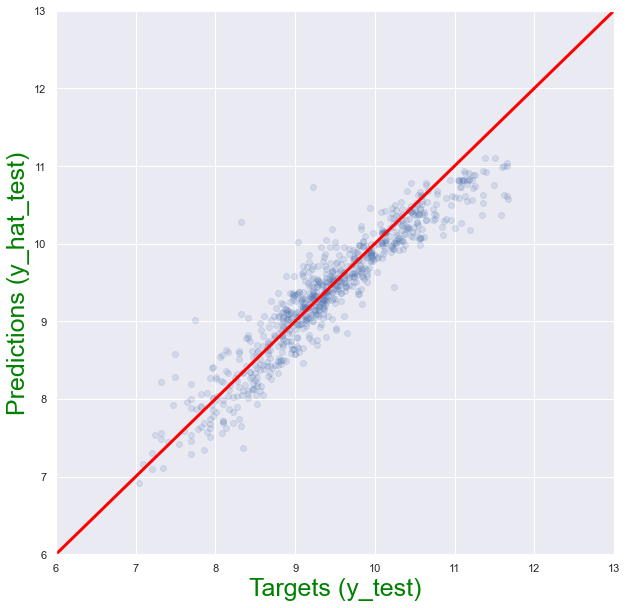

In [66]:
# Let's now create a scatter plot of "y_hat_test" and "y-test".

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_hat_test, alpha=0.15) # The "alpha" argument (which takes values between 0 and 1)
                                            # creates the specified level of opacity of the data points.
                                            # The area with the highest colour saturation indicates
                                            # where most of the data points occur.
                                            # This shows us whether most of the points are close to the line,
                                            # indicating that our model performs well on majority of the test data.
plt.xlabel('Targets (y_test)',size=25, c="green")
plt.ylabel('Predictions (y_hat_test)',size=25, c="green")
plt.xlim(6,13)
plt.ylim(6,13)

plt.axline((0,0), slope=1, c="red", linewidth=3)
plt.show()

### Finally, we will manually check the predicted prices and compare them to the actual (observed) prices to confirm our interpretation of the scatter plot above (which is that our model is considerably accurate).

In [67]:
# Remember we have been working with log of prices from around the beginning of this exercise.
# To obtain the normal prices now, we take the exponential of the log_price
# (exponential is like the opposite of log, it converts the log prices back to "normal" prices).
# We must do this for the predicted test prices and the actual/observed test prices.

normal_prices = pd.DataFrame(np.exp(y_hat_test), columns=["Predicted Test Prices"]) # Predicted normal prices
normal_prices.head()

,Predicted Test Prices
0,6591.156218
1,8672.293430
2,11663.810796
3,22524.624321
4,8217.383625


In [68]:
# We will also find the normal observed test prices and include them in the data frame - "normal_prices",
# so we can manually compare the "Predicted Test Prices" with the "Actual Test Prices".
normal_prices["Actual Test Prices"] = np.exp(y_test)
normal_prices.head()

,Predicted Test Prices,Actual Test Prices
0,6591.156218,NaN
1,8672.293430,NaN
2,11663.810796,NaN
3,22524.624321,NaN
4,8217.383625,NaN


### We can see from the data frame above that we have missing values (NaN). This shows that there is something wrong with the data frame. Let's address this...

In [69]:
# The reason for the missing values is that we need to reset the indexing of the data frame for y_test
# before converting the log prices back to normal test prices.

y_test = y_test.reset_index(drop=True)

# Checking the result
y_test.head()

0    9.024011
1    9.615805
2    9.574983
3    9.495591
4    8.699348
Name: log_price, dtype: float64

In [70]:
# Let's now overwrite the "Actual Test Prices" column with the re-indexed y_test,
# while not forgetting to find the exponential of the log prices to obtain the normal prices.
normal_prices["Actual Test Prices"] = np.exp(y_test)
normal_prices

,Predicted Test Prices,Actual Test Prices
0,6591.156218,8300.00
1,8672.293430,15000.00
2,11663.810796,14400.00
3,22524.624321,13300.95
4,8217.383625,5999.00
...,...,...
765,6327.619992,4600.00
766,14742.571153,14900.00
767,12566.123982,10200.00
768,8885.392985,9999.00


### We can see from the data frame above that majority of the prices on either side of the table are not far from each other. To give a clearer indication of our prediction accuracy, I will add another column to the data frame showing the percentage differences between the predicted and actual test prices.

In [71]:
normal_prices["Difference"] = normal_prices["Actual Test Prices"] - normal_prices["Predicted Test Prices"]

# We are most interested in finding out how close our predictions are to the actual prices,
# not so much whether our predictions are higher or lower than the actual prices.
# Consequently, we will compute the absolute percentage differences.

normal_prices["% Difference"] = np.absolute(normal_prices["Difference"]/normal_prices["Actual Test Prices"]*100)
normal_prices

,Predicted Test Prices,Actual Test Prices,Difference,% Difference
0,6591.156218,8300.00,1708.843782,20.588479
1,8672.293430,15000.00,6327.706570,42.184710
2,11663.810796,14400.00,2736.189204,19.001314
3,22524.624321,13300.95,-9223.674321,69.345981
4,8217.383625,5999.00,-2218.383625,36.979224
...,...,...,...,...
765,6327.619992,4600.00,-1727.619992,37.556956
766,14742.571153,14900.00,157.428847,1.056569
767,12566.123982,10200.00,-2366.123982,23.197294
768,8885.392985,9999.00,1113.607015,11.137184


### For additional insights into our test, let us get the descriptive statistics for the "normal_prices" data frame.

In [72]:
normal_prices.describe()

,Predicted Test Prices,Actual Test Prices,Difference,% Difference
count,770.000000,770.000000,770.000000,770.000000
mean,15930.049814,18571.480870,2641.431056,23.938100
std,12445.209871,19389.733947,9933.182646,32.672567
min,1013.638821,1150.000000,-35204.068554,0.015945
25%,7054.263775,7025.000000,-1153.724015,8.593317
50%,11990.007968,11650.000000,615.764819,17.972431
75%,21608.037790,22500.000000,2603.656778,31.223165
max,66658.173787,116500.000000,77498.820388,608.933514


### A few great insights we can obtain from the table above (which summarises our model's performance):

##### 1. The average percentage difference between the actual prices of the cars in our test data and the corresponding prices predicted by our 2nd model is 23.9% (as opposed to 24.3% in our 1st model).

##### 2. For 75% of the cars in our test data, the percentage difference between actual and predicted prices does not exceed 31.2% (as opposed to 31.3% in our 1st model).

##### 3. I realise that the maximum percentage difference in price seems rather large at 608.9%, but it should be noted that this occurs for only 1 observation. You may scroll down the full data frame in the last cell below to confirm this.

### I think we can say at this point that our 2nd model performs slightly better than our 1st model so our attempt at improving the 1st model is validated.

### Extra:
##### Let us display all rows of our test results, then round the results to 2 decimal places and sort the values in ascending order according to the percentage price difference.

In [73]:
# It can be useful to check all our results manually so we will use the relevant pandas syntax:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)

normal_prices.sort_values(by=["% Difference"])

,Predicted Test Prices,Actual Test Prices,Difference,% Difference
701,17902.85,17900.00,-2.85,0.02
666,28962.98,29000.00,37.02,0.13
532,37057.73,37000.00,-57.73,0.16
524,11779.46,11800.00,20.54,0.17
467,9717.23,9700.00,-17.23,0.18
14,17953.78,17999.00,45.22,0.25
425,20552.89,20500.00,-52.89,0.26
195,27404.71,27500.00,95.29,0.35
112,33850.31,34000.00,149.69,0.44
550,11942.00,11999.00,57.00,0.48
